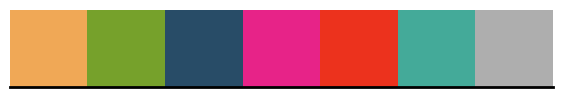

In [1]:
%load_ext autoreload
%autoreload 2
from fray_benchmark.visualizer.bench_result import *
paper_path = "/home/aoli/repos/fray-paper/figs"

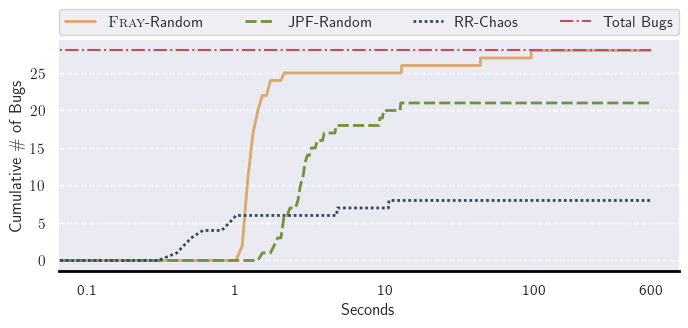

In [2]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/sctbench"])
ax = suite.generate_bug_over_time_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/sctbench-time.pdf", bbox_inches='tight')

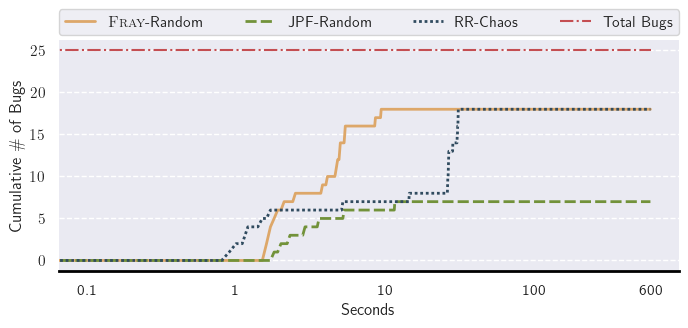

In [3]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe"])
ax = suite.generate_bug_over_time_fig("time")
fig = ax.get_figure()
fig.savefig(f"{paper_path}/jacontebe-time.pdf", bbox_inches='tight')

['jacontebe-0', 'jacontebe-1', 'jacontebe-12', 'jacontebe-15', 'jacontebe-16', 'jacontebe-17', 'jacontebe-18', 'jacontebe-20', 'jacontebe-22', 'jacontebe-23', 'jacontebe-4', 'jacontebe-3', 'jacontebe-5', 'jacontebe-6', 'jacontebe-9', 'jacontebe-7', 'jacontebe-21', 'jacontebe-24', 'jacontebe-14', 'jacontebe-11', 'jacontebe-2']


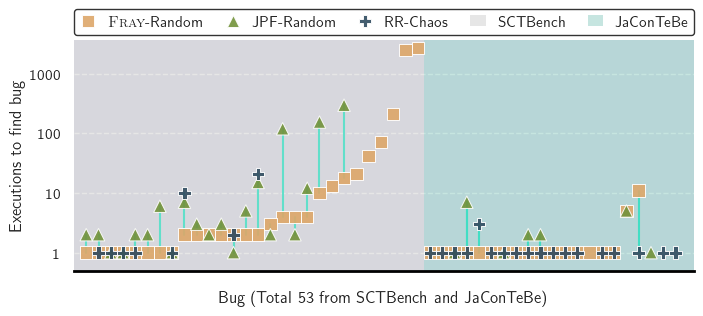

In [4]:
suite = BenchmarkSuite([
    # "/data/output/exec-1/sctbench",
    "/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe",
    "/home/aoli/repos/fray-benchmark/output/exec-1/sctbench",
    # "/data/output/exec-1/jacontebe",
    ])
ax = suite.generate_search_space_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/searchspace.pdf", bbox_inches='tight')

['jacontebe-22', 'jacontebe-23', 'jacontebe-7', 'jacontebe-18', 'jacontebe-20', 'jacontebe-10', 'jacontebe-19', 'jacontebe-14', 'jacontebe-2', 'jacontebe-9', 'jacontebe-13', 'jacontebe-15', 'jacontebe-16', 'jacontebe-0', 'jacontebe-12', 'jacontebe-3', 'jacontebe-1', 'jacontebe-17', 'jacontebe-11', 'jacontebe-4', 'jacontebe-8', 'jacontebe-5', 'jacontebe-21', 'jacontebe-24', 'jacontebe-6']


/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:439: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set(ylim=(ticks[0]-0.5, ylim))


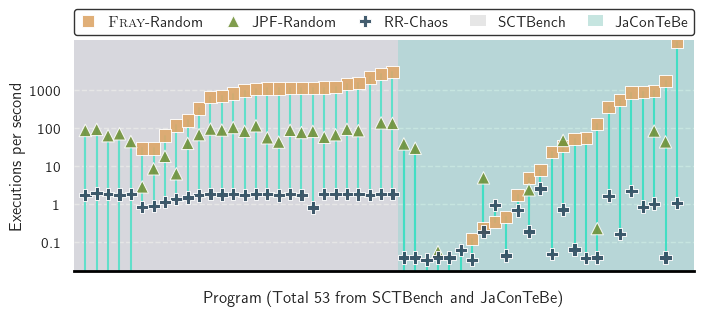

In [5]:
ax = suite.generate_exec_speed_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/execspeed.pdf", bbox_inches='tight')

In [7]:
suite = BenchmarkSuite([
    "/data/output/exec-1/sctbench",
    "/data/output/exec-1/jacontebe",
                        ])
ax = suite.generate_exec_speed_table()
fig = ax.get_figure()
fig.savefig(f"{paper_path}/execspeed.pdf", bbox_inches='tight')

/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:496: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('Cumulative \# of Bugs')
/home/aoli/repos/fray-benchmark/fray_benchmark/visualizer/bench_result.py:496: SyntaxWarning: invalid escape sequence '\#'
  ax.set_ylabel('Cumulative \# of Bugs')


FileNotFoundError: [Errno 2] No such file or directory: '/data/output/exec-1/sctbench'

In [3]:
import pandas as pd

suite = BenchmarkSuite([
    "/data/output/bug-1/guava",
    "/data/output/bug-1/lucene",
    "/data/output/bug-1/kafka",
    "/data/output/bug-1/lincheck",
    ])

df = suite.to_aggregated_dataframe()
df = df[df["error"] == "Error"]

display(df)

Folder /data/output/bug-1/guava/jpf/results not found


Exception: No results folder found

In [8]:
suite = BenchmarkSuite(["/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe"])
for bench in suite.benchmarks:
    print(bench.path)
    bench.to_csv()
# suite.generate_bug_table()

/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe/random/iter-0
/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe/jpf/iter-0
/home/aoli/repos/fray-benchmark/output/exec-1/jacontebe/rr/iter-0


In [2]:
suite = BenchmarkSuite(["/usr0/home/aoli/repos/fray-benchmark/output/race-check/guava"])
for bench in suite.benchmarks:
    bench.to_csv()
suite.generate_bug_table()

,Technique,Test Run,Failure,Time (FP)
0,$\textsc{Fray}$-Random,1193,59,135 (0)


In [15]:
import pandas as pd
suite = BenchmarkSuite([
    "/usr0/home/aoli/tmp/output/bug-1/lincheck",
    "/usr0/home/aoli/tmp/output/bug-1/guava",
    "/usr0/home/aoli/tmp/output/bug-1/lucene",
    "/usr0/home/aoli/tmp/output/bug-1/kafka",
    ])

df = suite.to_aggregated_dataframe()
df = df[df["error"] == "Error"]
df = df[df["type"] == "TP"]
df = df[df["Technique"] == "$\\textsc{Fray}$-POS"]
print(df["total_iter"].max())
display(df)


11648


,id,trial,error,type,bug_time,bug_iter,total_time,total_iter,Technique
0,lincheck-0,iter-0,Error,TP,2.13,3,2.13,3,$\textsc{Fray}$-POS
1,lincheck-1,iter-0,Error,TP,2.20,3,2.20,3,$\textsc{Fray}$-POS
2,lincheck-2,iter-0,Error,TP,1.90,1,1.90,1,$\textsc{Fray}$-POS
3,lincheck-3,iter-0,Error,TP,0.63,10,0.63,10,$\textsc{Fray}$-POS
4,lincheck-4,iter-0,Error,TP,2.12,19,2.12,19,$\textsc{Fray}$-POS
...,...,...,...,...,...,...,...,...,...
12240,kafka-87,iter-1,Error,TP,0.00,3,0.00,3,$\textsc{Fray}$-POS
12243,kafka-9,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS
12244,kafka-90,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS
12246,kafka-92,iter-1,Error,TP,0.00,1,0.00,1,$\textsc{Fray}$-POS


{'com.google.common.util.concurrent.UninterruptibleFutureTest#runNInterruptsTest', 'com.google.common.util.concurrent.Monitor#awaitNanos', 'com.google.common.util.concurrent.SequentialExecutorTest#testTaskThrowsError', 'com.google.common.util.concurrent.Monitor#enterWhenUninterruptibly', 'com.google.common.util.concurrent.FuturesTest#testScheduleAsync_asyncCallable_cancelledBeforeCallingFunction', 'com.google.common.cache.LocalLoadingCacheTest#testRecursiveComputation', 'com.google.common.collect.Queues#drain', 'com.google.common.util.concurrent.ListenableFutureTester#testCancelledFuture', 'com.google.common.util.concurrent.Monitor#enter', 'com.google.common.util.concurrent.Uninterruptibles#getUninterruptibly', 'com.google.common.util.concurrent.FuturesTest#testWhenAllComplete_asyncResult', 'com.google.common.util.concurrent.Monitor#enterIfInterruptibly', 'com.google.common.util.concurrent.GeneratedMonitorTest#runTest', 'com.google.common.util.concurrent.Monitor#enterInterruptibly', 'c

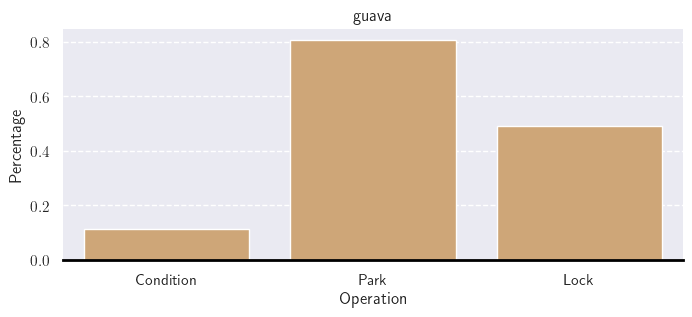

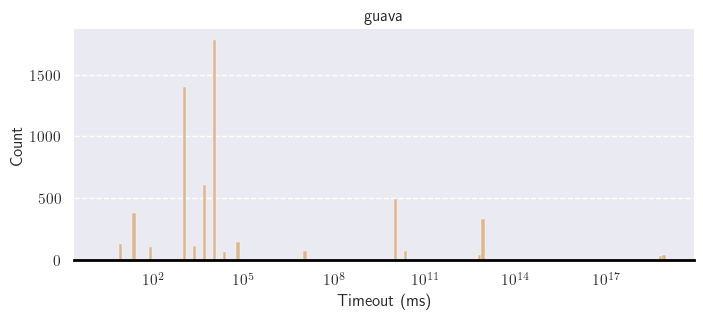

In [9]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/guava"])
suite.to_timed_stats()

Condition 84
Park 264


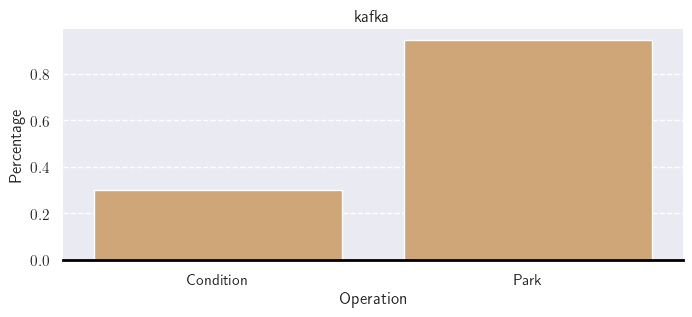

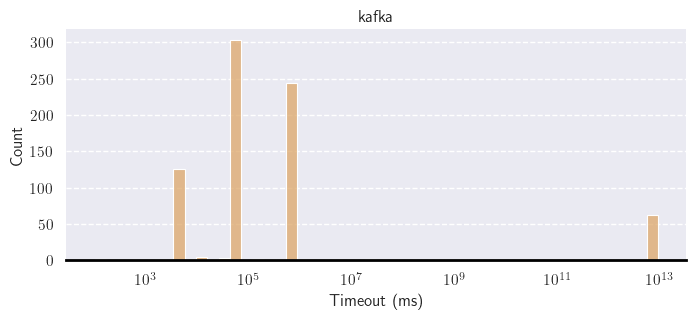

In [5]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/kafka"])
suite.to_timed_stats()

Condition 139
Park 941
Lock 592


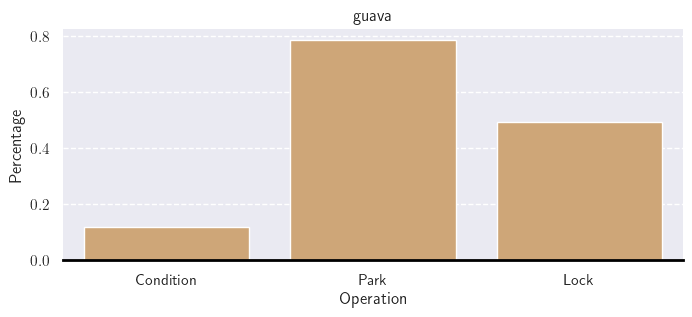

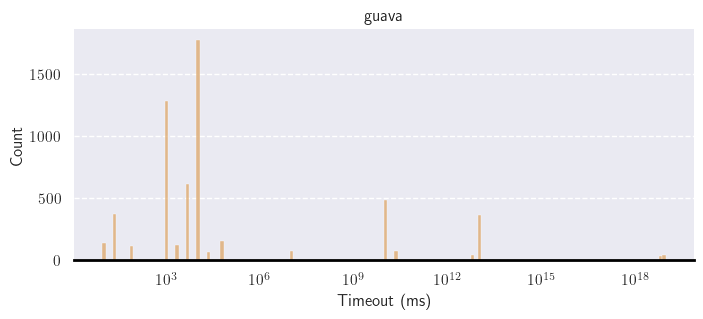

In [6]:
suite = BenchmarkSuite(["/Users/aoli/repos/sfuzz-benchmark/output/stat/guava"])
suite.to_timed_stats()